# Programming for Data Analysis

## Project 2019

The following project consists of generating a dataset using numpy.random package, with the following steps.

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables

* Investigate the types of variables involved, their likely distributions, and their relationships with each other.

* Synthesise/simulate a data set as closely matching their properties as possible

* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

I have an interest in Irish players playing in the English Soccer leagues, therefore I have chosen to base my dataset around this phenomenon. Variables including Name, Surname, Age, County of Ireland, Playing Position and League in which they play. I have used a number of sources for my data and these will be listed in each variable section. In this project there are a number of references to "probability" and "likelihood" in numerical format as a decimal percentage of 1.

In [3]:
# To begin with we add in all the packages we intend to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

As part of this project a number of external sources of data are required and these datasets are stored in a sub-folder within this repository, called **data**.

### Name

The first variable chosen was the first name of the player. This variable was taken from the CSO website "the Top baby boys names 2014". Although the source of the data may not be the most current, the statistical calculations to follow hold through. The data was stored in a CSV file and stored in the data folder under the name forenames

In [4]:
df_fornames = pd.read_csv("data/fornames.csv")

In [5]:
df_fornames.head()

,Name,Qty,Percentage
0,Jack,786,0.055705
1,James,695,0.049256
2,Daniel,638,0.045216
3,Conor,581,0.041176
4,Seán,526,0.037279


The dataset has 3 number columns - Name, Qty and Percentage. This information can be used to randomly generate a boys name using the probability and the variable name. For this we used the 

**numpy.random.choice(a, size=None, replace=True, p=None)**

In [6]:
#First from the df_fornames we define the name array
forname_array = df_fornames["Name"].tolist()
# We then define the pobility of these names arrising
forname_percent = df_fornames["Percentage"].tolist()

forname = np.random.choice(forname_array, 1, p=forname_percent)
print(forname)

['Noah']


https://www.cso.ie/en/releasesandpublications/ep/p-1916/1916irl/people/names/

### Surname

Similarly to above, the surname follows the same sequence as the forename. The independent.ie revealed the top 20 Irish surnames in December 2019. We then assumed these to be the surname variables. This data was also stored as a CSV file and stored in data folder.

In [7]:
df_surenames = pd.read_csv("data/surname.csv")

In [8]:
df_surenames.head()

,Surname
0,Murphy
1,Kelly
2,Byrne
3,Ryan
4,O'Brien


For this variable we have no quantity or percentage breakdown - therefore we give them all equal likelihood of occurrence 1/20.

In [9]:
surname = df_surenames["Surname"]
S_name = surname[int(np.random.choice(19,1))]
print(S_name)

O'Neill


https://www.independent.ie/irish-news/revealed-top-20-irish-surnames-31414892.html

### Age

The age variable was taken as another assumption ages 15 through to 33 with a triangle statistical distribution. We have assumed youngsters start to head to England at the age of 15 and it peaks at 18 and gradually tapers down to the age of 33, where we assumed the career of a professional footballer ends. The thought process behind this is that at a young age, players are scouted by teams and then given short-term contracts and then over time with injuries and not been given contract extensions the probability decreases with age. This assumed distribution takes the form of:

**numpy.random.triangular(left, mode, right, size=None)**

In [10]:
# the left most age is 15, mode/average is 18 and the right is 33
age = np.random.triangular(15, 18, 33, 1)

In [11]:
print(age)

[24.56008728]


### County

As before for the county of origin of each of the players we decided to base this on the probability/likelihood of coming from each county based on population. Wikipedia has taken data from the CSO census of 2016 for the entire island of Ireland. This data was taken and stored in a CSV file in the data folder. The CSV file contains 3 number columns County, Population and Province. We can use the population data to determine the likelihood of the county of origin of each of the players. Further calculations are required.

In [12]:
df_county = pd.read_csv("data/population_per_county.csv")

In [13]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
County        32 non-null object
Population    32 non-null float64
Province      32 non-null object
dtypes: float64(1), object(2)
memory usage: 848.0+ bytes


In [14]:
df_county.head()

,County,Population,Province
0,Dublin,1347359.0,Leinster
1,Antrim,618108.0,Ulster
2,Cork,542868.0,Munster
3,Down,531665.0,Ulster
4,Galway,258058.0,Connacht


In order to determine the probability breakdown per county we need to total the population column. Totalled below - 6,573,732 people. We can then determine the percentage probability breakdown per county.

In [15]:
pop = df_county['Population'].sum()
print(pop)
df_county['propibility'] = df_county['Population'] / pop

6573732.0


In [16]:
df_county.head()

,County,Population,Province,propibility
0,Dublin,1347359.0,Leinster,0.204961
1,Antrim,618108.0,Ulster,0.094027
2,Cork,542868.0,Munster,0.082581
3,Down,531665.0,Ulster,0.080877
4,Galway,258058.0,Connacht,0.039256


As previous variables we use the choice function to randomly choose a county for the player to come from.

In [17]:
county_array = df_county["County"].tolist()
county_percent = df_county["propibility"].tolist()

county1 = np.random.choice(county_array, 1, p=county_percent)
county = str(county1)

print(county)

['Dublin']


https://en.wikipedia.org/wiki/List_of_Irish_counties_by_population

### Position

The position of the player is a slightly more straight forward calculation. Here we look at a basic team formation of 1 Goalkepper (GK), 4 Defenders (DF), 4 Midfielders (MD) and 2 Forwards (FW). From this we can calculate the probability of each position occurring. As an example the goalkeeper will occur 1 in every 11 players on the pitch. For the position variable we randomly select a position for the player using the numpy.random.choice function as the previous variables.  

In [18]:
# GK = 1/11  0.09
# DF = 4/11  0.36
# MD = 4/11  0.36
# FW = 2/11  0.19

position = ['GK', 'DF', 'MD', 'FW']
pos_prob = [0.09, 0.36, 0.36, 0.19]

pos = np.random.choice(position, 1, p=pos_prob)
print(pos)

['GK']


### League

We can now determine which league the player plays in again using the choice function in numpy.random. Soccerway.com has a full database of all players playing in any league in the world. This database can be filtered to determine all the Irish players playing in each league. This information is then stored in a CSV file named leagues in the data folder. This CSV gives a full list of all the current players the league and club they play for.

In [19]:
df_leagues = pd.read_csv("data/leagues.csv")

In [20]:
df_leagues.head()

,Player,League,Club
0,K. Long,Premier League,Burnley
1,C. Kelleher,Premier League,Liverpool
2,L. Richards,Premier League,Wolverhampton Wanderers
3,G. Kilkenny,Premier League,AFC Bournemouth
4,S. Coleman,Premier League,Everton


In [21]:
# Number of players in the list!
df_leagues.count()

Player    212
League    212
Club      212
dtype: int64

In [22]:
df_leagues.League.unique()

array(['Premier League', 'Championship', 'League One', 'League Two',
       'National League', 'National League N/S', 'Non League Premier',
       'Non League Div One'], dtype=object)

The next step is to determine the probability and name of the league the players are listed in. This column in the CSV file is labelled "League".

In [23]:
# Define a sub-table "LeaguesAndProb" - Leagues and probility
LeaguesAndProb= df_leagues['League'].value_counts(normalize=True)
league_prob = LeaguesAndProb.values
league_name = LeaguesAndProb.index

league = np.random.choice(league_name, 1, p=league_prob)
print(LeaguesAndProb)
print("\n \nThe randomly generated league selected is: ")
print(league)

League One             0.198113
League Two             0.183962
Championship           0.169811
Premier League         0.127358
National League        0.117925
National League N/S    0.099057
Non League Premier     0.066038
Non League Div One     0.037736
Name: League, dtype: float64

 
The randomly generated league selected is: 
['Championship']


https://ie.soccerway.com/players/players_abroad/ireland-republic/

### Final Data Point

We can now create a new data frame using all the above variables and the numpy.random functions.

In [24]:
# Define the dataframe and incude all the column names
df_rand_players = pd.DataFrame(columns=['Forname','Surname','County','Age','Position','League'])

In [25]:
# Include all the additonal CSV files that do not carry over from the above code.
surname = df_surenames["Surname"]

# We can now loop trough a qunatity of players to generate in this case we can select 1000

for i in range(212):
    
    # Firstly we declare all the varibales and 
    name = np.random.choice(forname_array, 1, p=forname_percent)
    player_surname = surname[int(np.random.choice(19,1))]
    county = np.random.choice(county_array, 1, p=county_percent)
    age = np.random.triangular(16, 18, 33, 1)
    pos = np.random.choice(position, 1, p=[0.09, 0.36, 0.36, 0.19])
    league = np.random.choice(league_name, 1, p=league_prob)
    
    # We can now append all the players into the datafrome, one after the next populating all the columns.
    
    df_rand_players = df_rand_players.append({'Forname': name[0],
                                           'Surname': player_surname,
                                           'County': county[0],
                                           'Age': round(age[0],2),
                                           'Position': pos[0],
                                           'League': league[0]}, ignore_index=True)

In [26]:
df_rand_players.head()

,Forname,Surname,County,Age,Position,League
0,Conor,O'Connor,Kildare,21.61,MD,Premier League
1,Oliver,Brennan,Cork,19.65,DF,Championship
2,Darragh,Kavanagh,Kilkenny,24.78,FW,Championship
3,Harry,Fitzgerald,Clare,26.83,DF,Non League Premier
4,Liam,Daly,Londonderry,20.15,DF,National League N/S


We can now introduce an additional column based on other columns in the dataframe. In this project we will look at the number of Irish caps a player has received. This is based on the league in which they play along with their age. If a player plays in the Premier league and is above a certain age they are more likely to have played for the Irish National Team as the leagues decrease and their age decreases, so too does the likelihood of involvement. The following snippet of code will add random number of caps per player based on age and league.

In [27]:
if "Irish_Caps" not in df_rand_players:
    df_rand_players["Irish_Caps"] = ""

for index, row in df_rand_players.iterrows():
    age = row['Age']
    league = row['League']
    cap = float()
    if age < 20 and league=='Premier League':
        cap = float(np.random.randint(1, 10, 1))
    elif age >= 20 and league=='Premier League':
        cap = float(np.random.randint(1, 25, 1))
    elif age >= 28 and league=='Premier League':
        cap = float(np.random.randint(1, 40, 1))
    elif age >= 20 and league=='Championship':
        cap = float(np.random.randint(0, 2, 1))
    elif age >= 20 and league=='Championship':
        cap = float(np.random.randint(0, 5, 1))
    df_rand_players.at[index, 'Irish_Caps'] = cap


In [28]:
df_rand_players.head()

,Forname,Surname,County,Age,Position,League,Irish_Caps
0,Conor,O'Connor,Kildare,21.61,MD,Premier League,19
1,Oliver,Brennan,Cork,19.65,DF,Championship,0
2,Darragh,Kavanagh,Kilkenny,24.78,FW,Championship,1
3,Harry,Fitzgerald,Clare,26.83,DF,Non League Premier,0
4,Liam,Daly,Londonderry,20.15,DF,National League N/S,0


In [29]:
# We now deine the Irish team based on more than one cap for Ireland
irish_players = df_rand_players[df_rand_players['Irish_Caps']>0]
irish_players.head()

,Forname,Surname,County,Age,Position,League,Irish_Caps
0,Conor,O'Connor,Kildare,21.61,MD,Premier League,19
2,Darragh,Kavanagh,Kilkenny,24.78,FW,Championship,1
8,John,McCarthy,Kildare,26.76,DF,Premier League,23
11,Charlie,McCarthy,Clare,17.87,FW,Premier League,6
12,Darragh,O'Neill,Wicklow,23.73,MD,Premier League,20


The df_rand_players dataframe was generated using the numpy.random package and a number of its functions. This dataframe was made up of 7 columns - Name, Surname, County, Age, Position, League and Irish Caps. We can now review the dataframe to ensure it has the characteristics we assumed.

## Analysis

We can now review the randomly generated dataset and compare it against the above criteria.

#### Forename

The following section of code will compare the original forename percentage breakdown versus the randomly generated forenames percentage breakdown dataset. From the randomly generated range of values (212 number) the percentage breakdown is listed in the table. The Percentage_x is the original CSV file listed while the Percentage_y is the randomly generated data above using the choice function.

In [30]:
# Define the randonly generated players forename and the percetnage breakdown
rough_work_Forename = (df_rand_players['Forname'].value_counts(normalize=True))
# Convert the above series into a datframe
check_forname = pd.DataFrame({'Name':rough_work_Forename.index, 'Percentage':rough_work_Forename.values})
# Now we merge the Original Forenames percentage and the randomly generated percentage
firstname_compare = df_fornames.merge(check_forname, how='outer', left_on='Name', right_on='Name')
# We now calcualte the percentage difference
firstname_compare['Difference'] = round(firstname_compare['Percentage_x'] - firstname_compare['Percentage_y'],3)
print(firstname_compare)

         Name  Qty  Percentage_x  Percentage_y  Difference
0        Jack  786      0.055705      0.042453       0.013
1       James  695      0.049256      0.047170       0.002
2      Daniel  638      0.045216      0.037736       0.007
3       Conor  581      0.041176      0.033019       0.008
4        Seán  526      0.037279      0.023585       0.014
5        Adam  493      0.034940      0.042453      -0.008
6        Luke  437      0.030971      0.023585       0.007
7        Noah  434      0.030758      0.037736      -0.007
8       Harry  398      0.028207      0.028302      -0.000
9     Charlie  389      0.027569      0.028302      -0.001
10      Dylan  384      0.027215      0.018868       0.008
11       Alex  383      0.027144      0.037736      -0.011
12      Oisin  381      0.027002      0.018868       0.008
13    Michael  379      0.026860      0.014151       0.013
14       Liam  378      0.026790      0.033019      -0.006
15       Ryan  373      0.026435      0.028302      -0.0

From the above table we can gain insights into the differences in the data.

In [31]:
first_average = firstname_compare['Difference'].mean()
first_max = firstname_compare['Difference'].max()
first_min = firstname_compare['Difference'].min()
rand_total = firstname_compare['Percentage_y'].sum()
print("Max difference:" + str(first_max) + "\n" + "Min Difference:" + str(first_min) + "\n" + "Mean Difference:" + str(round(first_average,5)) + "\n" + "Random Total:" + str(round(rand_total,5)) + "\n")

Max difference:0.014
Min Difference:-0.018
Mean Difference:5e-05
Random Total:1.0



The mean difference in the percentage difference is negligible of 0.005%. The Max difference is 0.014 or 1.4% for the name Sean - the expected value 0.037279 (3.72%) while the randomly generated percentage 0.014151 (1.41%) under half the expected value. The opposite is correct for the min value Cian 0.025585 (2.55%) is expected while the random generated values are 0.042453 (4.24%).

#### Surname

Shown below, the expected value for all the surnames percentage breakdown is 0.05 or 5%. For the randomly generated dataset the most common surname listed is Kavanagh at 8.49% and the least common is 1.88% Byrne.

In [32]:
check_Surname = (df_rand_players['Surname'].value_counts(normalize=True))
print(check_Surname)

Kavanagh      0.084906
McDonagh      0.080189
Brennan       0.075472
Doyle         0.066038
Dunne         0.066038
O'Reilly      0.061321
Kelly         0.061321
Daly          0.051887
Murphy        0.051887
O'Connor      0.051887
O'Neill       0.051887
McCarthy      0.051887
Ryan          0.047170
Walsh         0.042453
O'Sullivan    0.037736
Fitzgerald    0.033019
Lynch         0.033019
O'Brien       0.033019
Byrne         0.018868
Name: Surname, dtype: float64


#### Age

For the age variable of the player we used a triangular distribution for the random generated age. The range of ages started at 15 and finished at 33 with mean peak at 18. The below code isolates the ages of all the players randomly generated and plots them on a graph. We expect to see a triangle type shape starting at 15, finishing at 33 and weighted more heavily towards the left as the mean is 18 years. 

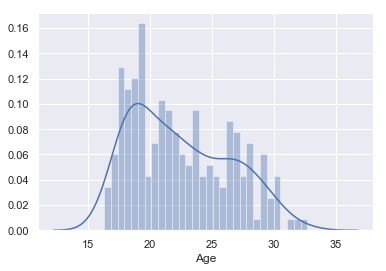

In [33]:
check_age = df_rand_players['Age']
sns.distplot(check_age, bins=30, color="b",)

The graph plotted has the expected characteristics described in the above section. 

#### County

As with the forename variable above, for the county we create a table of the percentage the county appears in the dataframe. Below is a table containing expected percentage breakdown and the randomly generated percentage breakdown.

In [35]:
rough_work_County = (df_rand_players['County'].value_counts(normalize=True))
check_County = pd.DataFrame({'County':rough_work_County.index, 'RandGen Percentage':rough_work_County.values})

county_compare = df_county.merge(check_County, how='outer', left_on='County', right_on='County')

county_compare['Difference'] = round(county_compare['propibility'] - county_compare['RandGen Percentage'],3)

print(county_compare[['County', 'Population', 'propibility', 'RandGen Percentage', 'Difference']])

         County  Population  propibility  RandGen Percentage  Difference
0        Dublin   1347359.0     0.204961            0.221698      -0.017
1        Antrim    618108.0     0.094027            0.080189       0.014
2          Cork    542868.0     0.082581            0.061321       0.021
3          Down    531665.0     0.080877            0.080189       0.001
4        Galway    258058.0     0.039256            0.042453      -0.003
5   Londonderry    247132.0     0.037594            0.051887      -0.014
6       Kildare    222504.0     0.033847            0.042453      -0.009
7         Meath    195044.0     0.029670            0.042453      -0.013
8      Limerick    194899.0     0.029648            0.023585       0.006
9        Tyrone    179000.0     0.027230            0.014151       0.013
10       Armagh    174792.0     0.026589            0.009434       0.017
11    Tipperary    159553.0     0.024271            0.014151       0.010
12      Donegal    159192.0     0.024216           

In [36]:
county_average = county_compare['Difference'].mean()
county_max = county_compare['Difference'].max()
county_min = county_compare['Difference'].min()
print("Max difference:" + str(county_max) + "\n" + "Min Difference:" + str(county_min) + "\n" + "Mean Difference:" + str(round(county_average,5)) + "\n")

Max difference:0.021
Min Difference:-0.02
Mean Difference:-0.00117



The maximum percentage difference is 2.1% for County Cork - the expected percentage for Cork is 8.25% while the randomly generated variables only make up 6.12%. The minimum difference is -2% for county Clare - 1.8% is expected while the randomly generated values made up 3.77% of the overall total of the 212 observations. After reviewing the above table it is also worth noting that the Counties - Laois,Offaly and Sligo are not represented in the randomly generated data frame, this may be due to the probability percentage of the original list. The counties are all listed below 2% and therefore each time the function is run there is a very slim chance it is selected as the random value.

#### Position

We can now look at the difference between the expected percentage breakdown versus the generated breakdown. The below is the breakdown of the expected percentage breakdown.

In [37]:
# GK = 1/11  0.09
# DF = 4/11  0.36
# MD = 4/11  0.36
# FW = 2/11  0.19

rand_position = df_rand_players['Position'].value_counts(normalize=True)
print(rand_position)

DF    0.391509
MD    0.320755
FW    0.198113
GK    0.089623
Name: Position, dtype: float64


As shown above the expected percentage breakdown differs to that of the randomly generated values. The goalkeeper results are similar 9% real versus 8.9% randomly generated - therefore in the random group of 212 8.9% are goalkeepers 19 number. The defenders and midfielders are expected to be the same 36% - the DF are 39.1% and the MD are 32%. The forwards are expected to be 19% and the random values equal 19.8%

#### League

As in the previous variables we will now review the Leagues in which the players play. 

In [44]:
rough_rand_League = df_rand_players['League'].value_counts(normalize=True)

rand_league = pd.DataFrame({'League':rough_rand_League.index, 'RandGen Percentage':rough_rand_League.values})
expected_league = pd.DataFrame({'League':LeaguesAndProb.index, 'Expected Percentage':LeaguesAndProb.values})

league_compare = expected_league.merge(rand_league, how='outer', left_on='League', right_on='League')
league_compare['Difference'] = round(league_compare['Expected Percentage'] - league_compare['RandGen Percentage'],3)
print(league_compare)

                League  Expected Percentage  RandGen Percentage  Difference
0           League One             0.198113            0.250000      -0.052
1           League Two             0.183962            0.160377       0.024
2         Championship             0.169811            0.155660       0.014
3       Premier League             0.127358            0.141509      -0.014
4      National League             0.117925            0.136792      -0.019
5  National League N/S             0.099057            0.089623       0.009
6   Non League Premier             0.066038            0.047170       0.019
7   Non League Div One             0.037736            0.018868       0.019


In [45]:
league_average = league_compare['Difference'].mean()
league_max = league_compare['Difference'].max()
league_min = league_compare['Difference'].min()
print("Max difference:" + str(league_max) + "\n" + "Min Difference:" + str(league_min) + "\n" + "Mean Difference:" + str(round(league_average,5)) + "\n")

Max difference:0.024
Min Difference:-0.052
Mean Difference:0.0



We can now review the leagues in which players play. The expected percentage breakdown is 19.8% of Irish players playing in England play in League One while only 12.7% play in the Premier League. The generated values have 25% of Irish players playing in League One and more players 14.1% playing in the Premier League.

#### Caps

For the following variable, Caps, we have no expected statistics. This variables was based on assumed likelihood of a player playing for Ireland the criteria we assumed was that a player was more likely to play in the higher two leagues and age.

In [39]:
irish_capped_players = df_rand_players[df_rand_players.Irish_Caps > 0]
 
print(irish_capped_players)

       Forname     Surname     County    Age Position          League  \
0        Conor    O'Connor    Kildare  21.61       MD  Premier League   
2      Darragh    Kavanagh   Kilkenny  24.78       FW    Championship   
8         John    McCarthy    Kildare  26.76       DF  Premier League   
11     Charlie    McCarthy      Clare  17.87       FW  Premier League   
12     Darragh     O'Neill    Wicklow  23.73       MD  Premier League   
14     Patrick     Brennan    Donegal  29.14       DF  Premier League   
21        Noah    O'Connor      Cavan  19.34       FW  Premier League   
24         Ben  O'Sullivan  Westmeath  23.10       MD  Premier League   
31       Ethan       Dunne    Kildare  18.74       DF  Premier League   
38      Daniel      Murphy      Kerry  26.46       DF  Premier League   
41       Fionn       Walsh     Dublin  27.42       DF  Premier League   
42         Ben     O'Neill     Carlow  19.48       MD  Premier League   
69     Darragh       Lynch     Dublin  16.63       

In [40]:
champ_plus20 = irish_capped_players[(irish_capped_players['Age'] >= 20) & ((irish_capped_players['League'] == 'Championship'))]['Irish_Caps'].mean()
champ_sub20 = irish_capped_players[(irish_capped_players['Age'] < 20) & ((irish_capped_players['League'] == 'Championship'))]['Irish_Caps'].mean()

prem_sub20 = irish_capped_players[(irish_capped_players['Age'] < 20) & ((irish_capped_players['League'] == 'Premier League'))]['Irish_Caps'].mean()
prem_plus20 = irish_capped_players[(irish_capped_players['Age'] >= 20) & ((irish_capped_players['League'] == 'Premier League'))]['Irish_Caps'].mean()
print("Average number of Caps for a player below twenty, playing in the Premier League:" + str(round(prem_sub20,2)))
print("Average number of Caps for a player above twenty, playing in the Premier League:" + str(round(prem_plus20)))
print("Average number of Caps for a player below twenty, playing in the Championship: " + str(champ_sub20))
print("Average number of Caps for a player above twenty, playing in the Championship:" + str(round(champ_plus20)))

Average number of Caps for a player below twenty, playing in the Premier League:5.75
Average number of Caps for a player above twenty, playing in the Premier League:14.0
Average number of Caps for a player below twenty, playing in the Championship: nan
Average number of Caps for a player above twenty, playing in the Championship:1.0


# Conclusion

In conclusion, as part of this project we randomly generated a dataframe using the **numpy.random** functions. We mostly used the **choice** function to generate variables and list them in a dataset. The dataset is made up of 
+ **Name** - the forty most common boys names in Ireland in 2014
+ **Surname** - which was the 20 most common Surnames in Ireland in 2019 
+ **Age** - of the player which is age range of 15-33 with a mean of 18 
+ **County** - the county of origin of the player based on the population of Ireland 
+ **Position** - the likelihood of the playing position of the player
+ **League** - the league in which the player plays
+ **Irish Caps** - the number of caps the player has received

The second section was to compare the two datasets - the expected versus the randomly generated dataframe. It is clear from the analysis that numpy.random functions have given a fair and relatively accurate reflection of the expected dataset. The functions were all called randomly and without any influence from the overall dataset. The main means of comparison is to determine the percentage breakdown of the dataset for each instances of a variable. One area to note is that there must be a percentage difference between expected and the randomly generated values, as each time is random and non-reliant on the overall dataset.

Finally this assignment has given me a good insight into the numpy.random packages and its capabilities. The project has also given me a good basis of how to manipulate dataframes and analyse them.